#**PHASE 3**

***Sun Flares detection system***

**This project focuses on predicting solar flare peak current per second (c/s) and energy magnitude using a variety of recurrent neural network architectures, including LSTM, GRU, and Bidirectional LSTM + GRU. Through systematic hyperparameter tuning, we aim to optimize model performance, offering an advanced tool for forecasting solar activities with enhanced accuracy and reliability. The project is implemented in a modular and transparent manner, making it a valuable resource for researchers and practitioners in the field of space weather prediction.

This repository contains a machine learning-based solar flare prediction system designed to analyze space weather data and forecast solar flares with high accuracy. Solar flares are sudden bursts of energy from the Sun that can impact satellite communications, power grids, and astronaut safety. By leveraging machine learning algorithms, this project aims to provide early warnings to mitigate potential risks.

🚀 Features:

✅ Data preprocessing and feature engineering for solar flare prediction

✅ Implementation of multiple machine learning models (e.g., Random Forest, SVM, Neural Networks)

✅ Performance evaluation with precision, recall, and F1-score

✅ Visualization of solar flare patterns using plots and graphs

✅ Dataset sourced from space weather databases (e.g., NOAA, NASA)**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the data with specified bcolumn classes
solar_flare = pd.read_csv("/content/dataset of fp.csv")
solar_flare.head()


,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [ ]:
solar_flare['start.date'] = solar_flare['start.date'].dt.strftime('%Y-%m-%d')


In [ ]:
solar_flare['start_datetime'] = pd.to_datetime(solar_flare['start.date'] + ' ' + solar_flare['peak'])
solar_flare['start_datetime']

,start_datetime
0,2002-02-12 21:33:38
1,2002-02-12 21:45:06
2,2002-02-13 00:54:54
3,2002-02-13 04:23:50
4,2002-02-13 07:05:14
...,...
113937,2016-12-26 22:17:02
113938,2016-12-26 23:28:18
113939,2016-12-27 08:39:06
113940,2016-12-27 12:21:30


In [ ]:
# Set 'start_datetime' as the index of the DataFrame
solar_flare.set_index('start_datetime', inplace=True)

In [ ]:
# Drop the specified columns from the 'solar_flare' DataFrame
columns_to_drop = ['start.date', 'start.time', 'peak', 'end']
solar_flare = solar_flare.drop(columns=columns_to_drop)

solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0,A0,GE,NS,PE,Q2
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0,A0,DR,NS,PE,Q2
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE


In [ ]:
solar_flare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113942 entries, 2002-02-12 21:33:38 to 2016-12-27 12:37:14
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   flare             113942 non-null  int64   
 1   duration.s        113942 non-null  int64   
 2   peak.c/s          113942 non-null  int64   
 3   total.counts      113942 non-null  float64 
 4   energy.kev        113942 non-null  category
 5   x.pos.asec        113942 non-null  int64   
 6   y.pos.asec        113942 non-null  int64   
 7   radial            113942 non-null  int64   
 8   active.region.ar  113942 non-null  category
 9   flag.1            113942 non-null  object  
 10  flag.2            113942 non-null  object  
 11  flag.3            94035 non-null   object  
 12  flag.4            93740 non-null   object  
 13  flag.5            52991 non-null   object  
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 11.7

In [ ]:
solar_flare.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000


In [ ]:
duplicates_count = solar_flare['flare'].duplicated(keep=False).sum()

value_counts = solar_flare['flare'].value_counts()

duplicates = value_counts[value_counts>1]
print(duplicates)
print(f"Number of duplicates in the 'flare' column: {len(duplicates)}")

flare
13111352    2
13111351    2
3042103     2
Name: count, dtype: int64
Number of duplicates in the 'flare' column: 3


In [ ]:
print("Length of dataframe before dropping duplicates: ", len(solar_flare))
solar_flare = solar_flare.drop_duplicates(subset='flare')
print("Length of dataframe after dropping duplicates: ", len(solar_flare))

Length of dataframe before dropping duplicates:  113942
Length of dataframe after dropping duplicates:  113939


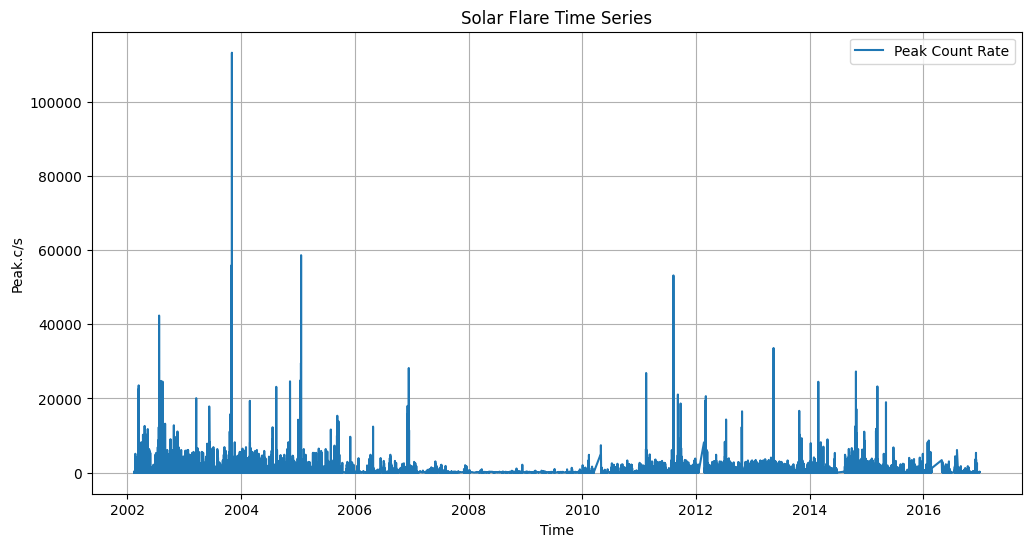

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['peak.c/s'], label='Peak Count Rate')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Peak.c/s')
plt.legend()
plt.grid(True)
plt.show()

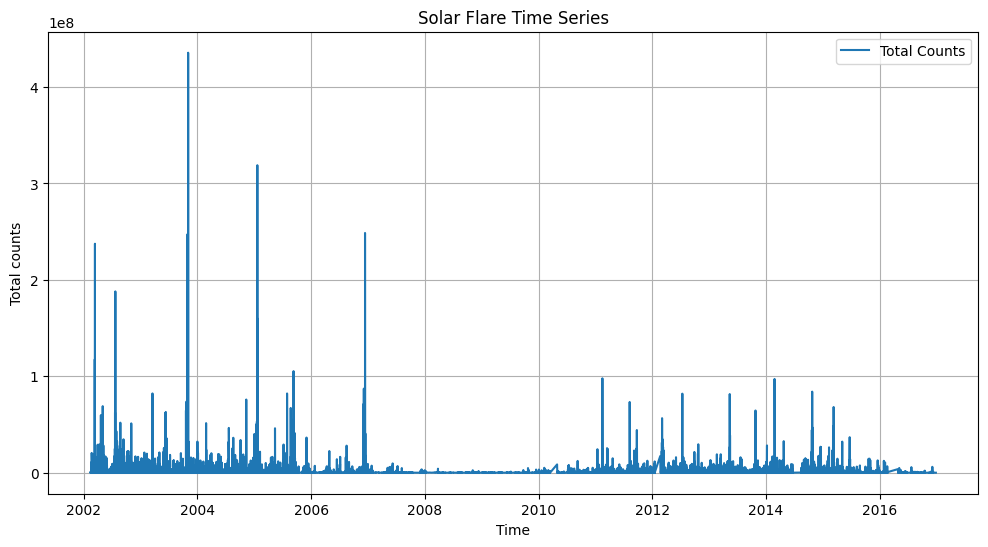

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['total.counts'], label='Total Counts')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Total counts')
plt.legend()
plt.grid(True)
plt.show()

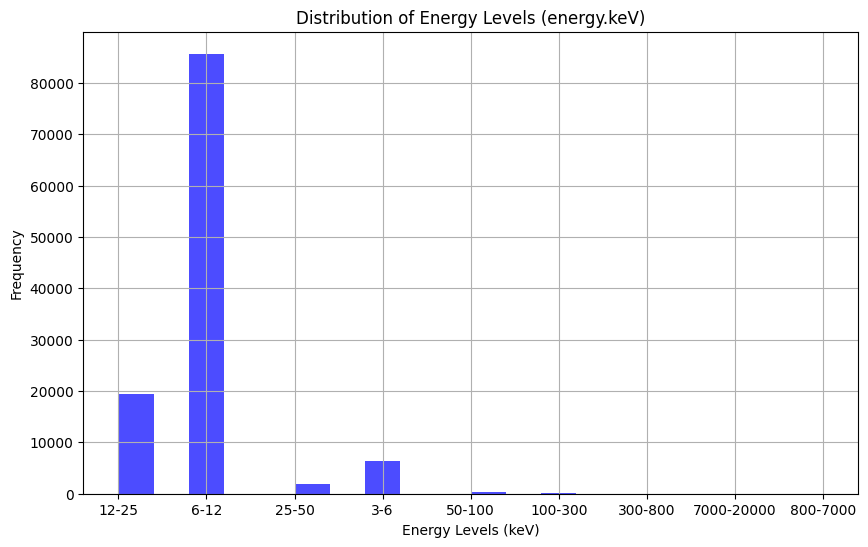

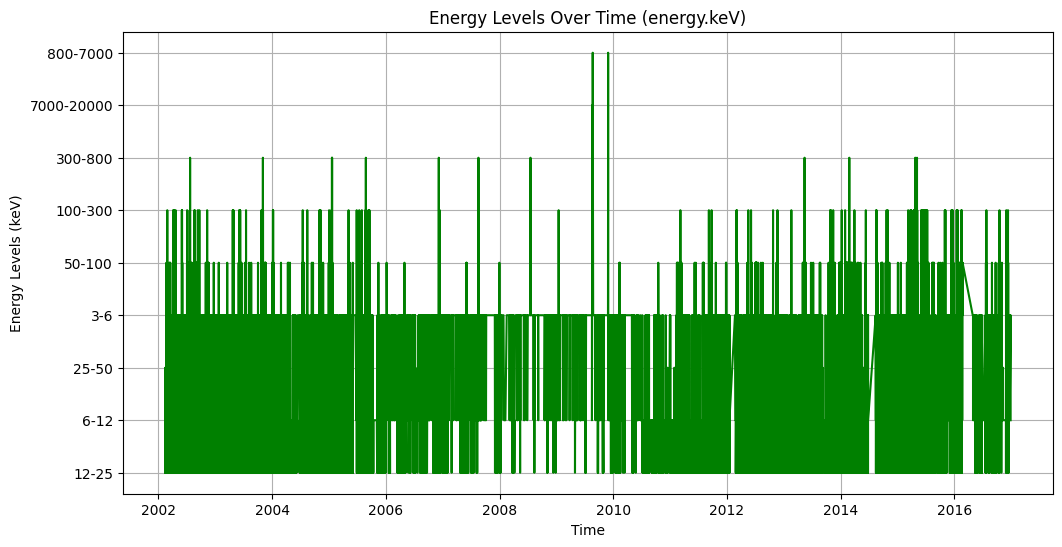

In [ ]:
import matplotlib.pyplot as plt

# Histogram of energy.keV
plt.figure(figsize=(10, 6))
plt.hist(solar_flare['energy.kev'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Energy Levels (energy.keV)')
plt.xlabel('Energy Levels (keV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Time Series Plot of energy.keV
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['energy.kev'], color='green')
plt.title('Energy Levels Over Time (energy.keV)')
plt.xlabel('Time')
plt.ylabel('Energy Levels (keV)')
plt.grid(True)
plt.show()

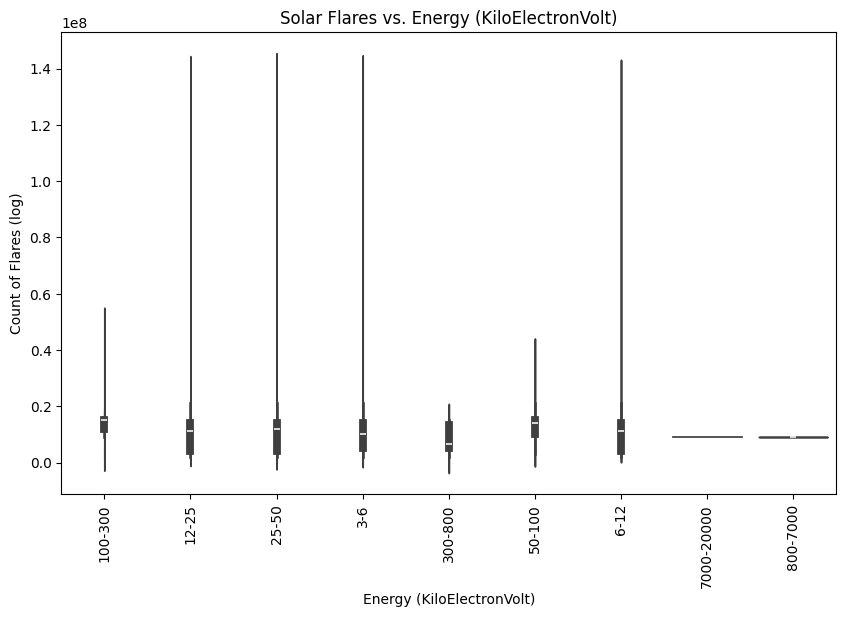

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=solar_flare, x='energy.kev', y='flare', fill='gold')
plt.title('Solar Flares vs. Energy (KiloElectronVolt)')
plt.xlabel('Energy (KiloElectronVolt)')
plt.ylabel('Count of Flares (log)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
solar_flare = solar_flare.iloc[:, :9]
solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar
start_datetime,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825
...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0


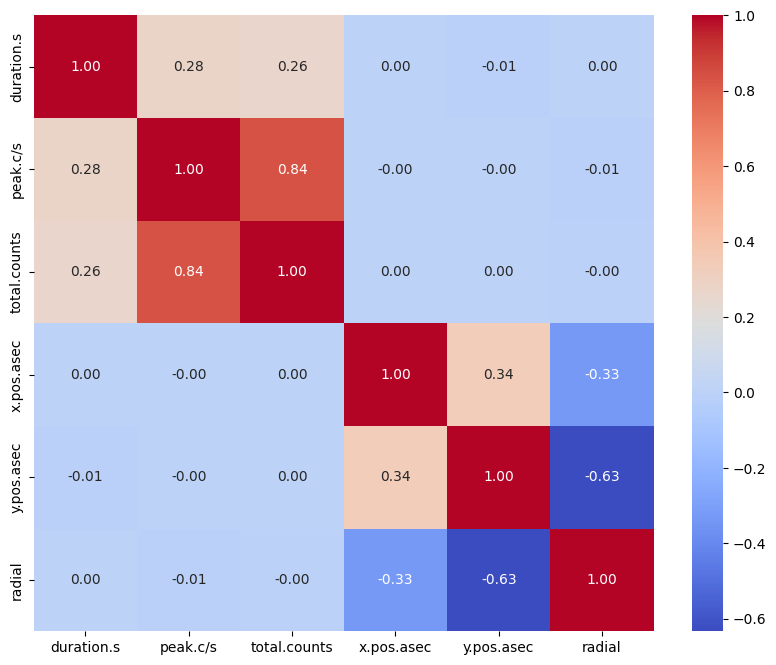

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the mentioned variables
correlation_matrix = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the variables of interest
X = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']]

# Add a constant for the intercept term
X['intercept'] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

# Find the variable with the highest VIF
variable_with_highest_vif = vif_data.loc[vif_data['VIF'].idxmax()]

# Display the variable with the highest VIF
print("Variable with the highest VIF:")
print(variable_with_highest_vif)

       Variable       VIF
0    duration.s  1.086169
1      peak.c/s  3.432127
2  total.counts  3.404821
3    x.pos.asec  1.158818
4    y.pos.asec  1.721463
5        radial  1.717288
6     intercept  5.202871
Variable with the highest VIF:
Variable    intercept
VIF          5.202871
Name: 6, dtype: object


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming y is your target variable
X = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']]
y = solar_flare['energy.kev']

# Use RandomForestRegressor for feature selection
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

# Display the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['duration.s', 'peak.c/s', 'total.counts', 'radial'], dtype='object')


In [ ]:
results=[]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extract the feature you want to forecast (e.g., 'peak.c/s')
target_feature = 'peak.c/s'

# Extract the target time series data
target_data = solar_flare[target_feature].values
# Normalize the data
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# Create sequences and corresponding target values
look_back = 10  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(target_data) - look_back):
    X.append(target_data[i:i + look_back])
    y.append(target_data[i + look_back])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

Epoch 1/100
1425/1425 - 12s - 8ms/step - loss: 5.9670e-05 - val_loss: 3.2203e-05
Epoch 2/100
1425/1425 - 10s - 7ms/step - loss: 5.9505e-05 - val_loss: 3.1591e-05
Epoch 3/100
1425/1425 - 9s - 6ms/step - loss: 5.9337e-05 - val_loss: 3.1644e-05
Epoch 4/100
1425/1425 - 10s - 7ms/step - loss: 5.9321e-05 - val_loss: 3.1240e-05
Epoch 5/100
1425/1425 - 11s - 8ms/step - loss: 5.9149e-05 - val_loss: 3.4617e-05
Epoch 6/100
1425/1425 - 9s - 7ms/step - loss: 5.9257e-05 - val_loss: 3.1387e-05
Epoch 7/100
1425/1425 - 9s - 6ms/step - loss: 5.9212e-05 - val_loss: 3.1161e-05
Epoch 8/100
1425/1425 - 10s - 7ms/step - loss: 5.9156e-05 - val_loss: 3.2447e-05
Epoch 9/100
1425/1425 - 20s - 14ms/step - loss: 5.9175e-05 - val_loss: 3.1442e-05
Epoch 10/100
1425/1425 - 9s - 6ms/step - loss: 5.9229e-05 - val_loss: 3.1771e-05
Epoch 11/100
1425/1425 - 9s - 7ms/step - loss: 5.9068e-05 - val_loss: 3.1218e-05
Epoch 12/100
1425/1425 - 11s - 8ms/step - loss: 5.9041e-05 - val_loss: 3.1158e-05
Epoch 13/100
1425/1425 - 9s -

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 261.54
Mean Squared Error (MSE): 84945.85
Root Mean Squared Error (RMSE): 291.45
R-squared (R²): -2609511247.58


In [ ]:
model_name="LSTM 2002-2016"
epochs=100
batch_size=64
recurrent_dropout=0.0

[[ 0.5052518  -0.09151858 -0.06833073  0.00481224]
 [-0.4731335  -0.24623813 -0.11971135  0.0087093 ]
 [-0.6392744  -0.23664312 -0.11907837 -0.39463705]
 ...
 [-0.2331522  -0.15868366 -0.11227451 -1.3435726 ]
 [ 0.06220942 -0.22584873 -0.11716121 -0.4452989 ]
 [-0.6761946  -0.1970637  -0.11920601  0.19771701]]
Epoch 1/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7409 - loss: 0.8482 - val_accuracy: 0.7203 - val_loss: 0.8862 - learning_rate: 0.0010
Epoch 2/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7698 - loss: 0.6905 - val_accuracy: 0.7180 - val_loss: 0.8783 - learning_rate: 0.0010
Epoch 3/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7703 - loss: 0.6878 - val_accuracy: 0.7192 - val_loss: 0.8738 - learning_rate: 0.0010
Epoch 4/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7737 - loss: 0.6791 - val_accuracy: 0.7192 - val_loss: 0.8819 - learning_rate: 0.0010
Epoch 5/100
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accura

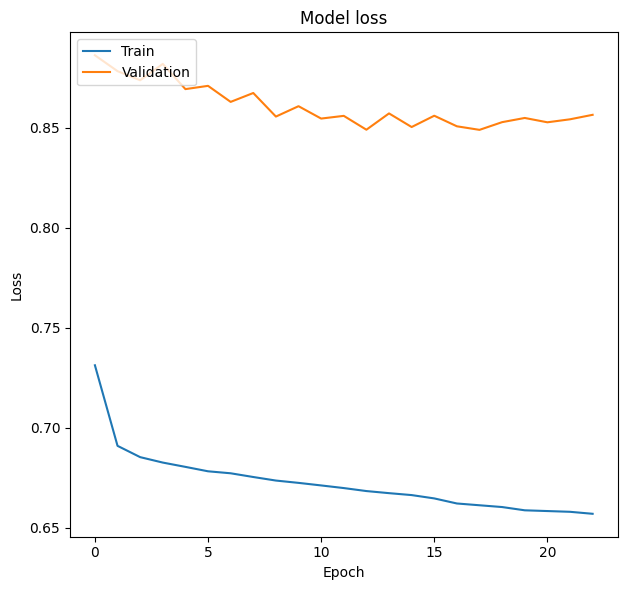

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7632 - loss: 0.7313
Test Accuracy: 72.63%


In [ ]:
!pip install tensorflow
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping # Import necessary classes


# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)


data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')